# Project 3 - Distributing COVID Vaccines in Tolland County

## Data Prep and EDA 

Reference: https://matplotlib.org/basemap/users/geography.html

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 14 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

In [3]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (1,077 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144882 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-

### 10 Towns with high confirmed cases in Tolland County

In [ ]:
# Read data from Excel file
from google.colab import files
# Command to upload file
uploaded = files.upload()

Saving Town Selected.xlsx to Town Selected.xlsx


In [ ]:
# Transform excel file in a pandas dataframe
df = pd.read_excel('Town Selected.xlsx') 
df

,Rank,Town,Per Capita Income,Population,Confirmed Case,Likely Case,X,Y
0,9,Vernon,33160,29179,362,18,-72.460747,41.836415
1,13,Mansfield,21579,26543,327,43,-72.228732,41.789205
2,7,Somers,35134,11444,323,23,-72.453051,41.994879
3,5,Ellington,37322,15602,133,9,-72.448494,41.915139
4,12,Stafford,28027,12087,130,10,-72.312328,41.987521
5,8,Coventry,34524,12435,90,5,-72.339406,41.782915
6,2,Tolland,41883,15052,82,12,-72.364935,41.878579
7,3,Hebron,39416,9686,55,2,-72.390321,41.659368
8,1,Bolton,42312,4980,39,2,-72.439088,41.766402
9,6,Columbia,36865,5485,32,0,-72.306977,41.693923


We wanted to ensure confirmed cases could receive the vaccine in the first place, so we select the top 10 towns with the most confirmed cases of COVID-19.

In [ ]:
# list of 10 towns with high confirned cases
df.sort_values(by='Confirmed Case', axis=0, ascending=False, inplace=True)
df.head(10)

,Rank,Town,Per Capita Income,Population,Confirmed Case,Likely Case,X,Y
0,9,Vernon,33160,29179,362,18,-72.460747,41.836415
1,13,Mansfield,21579,26543,327,43,-72.228732,41.789205
2,7,Somers,35134,11444,323,23,-72.453051,41.994879
3,5,Ellington,37322,15602,133,9,-72.448494,41.915139
4,12,Stafford,28027,12087,130,10,-72.312328,41.987521
5,8,Coventry,34524,12435,90,5,-72.339406,41.782915
6,2,Tolland,41883,15052,82,12,-72.364935,41.878579
7,3,Hebron,39416,9686,55,2,-72.390321,41.659368
8,1,Bolton,42312,4980,39,2,-72.439088,41.766402
9,6,Columbia,36865,5485,32,0,-72.306977,41.693923


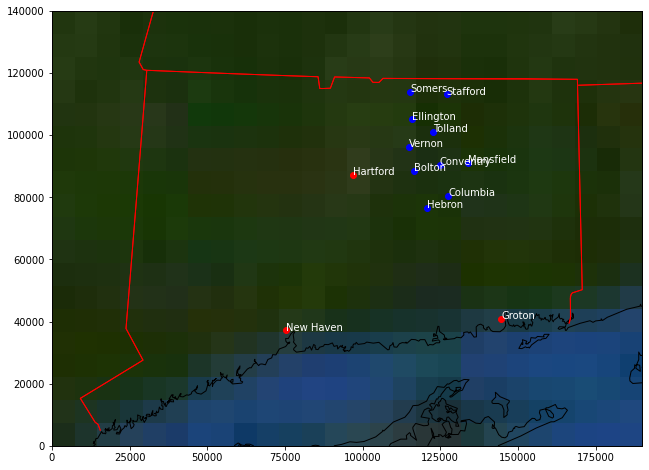

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
fig = plt.figure(figsize=(12,8))
m = Basemap( projection='lcc', resolution='h', 
            lat_0=41.6, lon_0=-72.7,
            width=190000, height=1.4E5, suppress_ticks=False)

# Hospitals
# New Haven = 41.3044,-72.9356, Hartford = 41.7545445,-72.6778707, Groton = 41.3363,-72.1046
lat_y_Hf = 41.7545445 
lon_x_Hf = -72.6778707 
x,y = m(lon_x_Hf,lat_y_Hf)
m.plot(x,y,'ro')
plt.text(x,y, 'Hartford', fontsize=10,  color='white')
latitudes_y = [41.3044, 41.3363]
longitude_x = [-72.9356, -72.1046]
x,y = m(longitude_x, latitudes_y)
m.plot(x,y,'ro')
plt.text(x[0],y[0], 'New Haven', fontsize=10,  color='white')
plt.text(x[1],y[1], 'Groton', fontsize=10,  color='white')

#Counties in CT
lat_y_county = [41.83641502,41.78920539,41.99487942,41.91513884,41.98752054,41.78291548,41.87857885,41.65936787,41.76640188,41.69392322]
lon_x_county = [-72.46074715,-72.22873186,-72.45305142,-72.44849422,-72.31232806,-72.33940561,-72.36493546,-72.39032091,-72.43908779,-72.30697725]
xCounty,yCounty =  m(lon_x_county, lat_y_county)
m.plot(xCounty,yCounty,'bo')
plt.text(xCounty[0],yCounty[0], 'Vernon', fontsize=10,  color='white')
plt.text(xCounty[1],yCounty[1], 'Mansfield', fontsize=10,  color='white')
plt.text(xCounty[2],yCounty[2], 'Somers', fontsize=10,  color='white')
plt.text(xCounty[3],yCounty[3], 'Ellington', fontsize=10,  color='white')
plt.text(xCounty[4],yCounty[4], 'Stafford', fontsize=10,  color='white')
plt.text(xCounty[5],yCounty[5], 'Conventry', fontsize=10,  color='white')
plt.text(xCounty[6],yCounty[6], 'Tolland', fontsize=10,  color='white')
plt.text(xCounty[7],yCounty[7], 'Hebron', fontsize=10,  color='white')
plt.text(xCounty[8],yCounty[8], 'Bolton', fontsize=10,  color='white')
plt.text(xCounty[9],yCounty[9], 'Columbia', fontsize=10,  color='white')

m.drawcoastlines()
m.drawcountries(linewidth=2.0, linestyle='solid',color='blue')
m.drawstates(linewidth=1.0, linestyle='solid',color='red')
#m.fillcontinents(color='white',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.bluemarble()
#m.etopo()

#m.readshapefile('/content/drive/My Drive/Colab Notebooks/Data/st99_d00', name='states', drawbounds=True)
#m.states_info
m.drawmapboundary(fill_color='aqua')
#plt.title("Miller Cylindrical Projection")
plt.show()

### Pairwise Distance 

In [ ]:
# Pairwise Distance
from sklearn.metrics.pairwise import haversine_distances
from math import radians


# hospitals
NewHaven =[41.3044,-72.9356]
Hartford =[41.7545445,-72.6778707]
Groton =[41.3363,-72.1046]

# towns
Vernon = [41.83641502,-72.46074715]
Mansfield = [41.78920539,-72.22873186,]
Somers = [41.9948794,-72.45305142]
Ellington = [41.91513884,-72.44849422]
Stafford = [41.98752054,-72.31232806]
Coventry = [41.78291548,-72.33940561]
Tolland = [41.87857885,-72.36493546]
Heborn = [41.65936787,-72.39032091]
Bolton = [41.76640188,-72.43908779]
Columbia = [41.69392322,-72.30697725]


NewHaven_in_radians = [radians(_) for _ in NewHaven]
Hartford_in_radians = [radians(_) for _ in Hartford]
Groton_in_radians = [radians(_) for _ in Groton]
Vernon_in_radians = [radians(_) for _ in Vernon]
Mansfield_in_radians = [radians(_) for _ in Mansfield]
Somers_in_radians = [radians(_) for _ in Somers]
Ellington_in_radians = [radians(_) for _ in Ellington]
Stafford_in_radians = [radians(_) for _ in Stafford]
Coventry_in_radians = [radians(_) for _ in Coventry]
Tolland_in_radians = [radians(_) for _ in Tolland]
Heborn_in_radians = [radians(_) for _ in Heborn]
Bolton_in_radians = [radians(_) for _ in Bolton]
Columbia_in_radians = [radians(_) for _ in Columbia]

result = haversine_distances([NewHaven_in_radians,
                              Hartford_in_radians,
                              Groton_in_radians,
                              Vernon_in_radians, 
                              Mansfield_in_radians,
                              Somers_in_radians,
                              Ellington_in_radians,
                              Stafford_in_radians,
                              Coventry_in_radians,
                              Tolland_in_radians,
                              Heborn_in_radians,
                              Bolton_in_radians,
                              Columbia_in_radians])
results = result * 6371000/1000  # multiply by Earth radius to get kilometers
results

array([[ 0.        , 54.45773439, 69.48770789, 71.13382354, 79.78977943,
        86.61561972, 79.06891119, 91.93384028, 72.75297288, 79.55157374,
        60.17643653, 65.93172083, 67.94663953],
       [54.45773439,  0.        , 66.62530555, 20.17053798, 37.44569567,
        32.56779296, 26.07700889, 39.83988018, 28.24682215, 29.37282533,
        26.11134452, 19.84950282, 31.5102686 ],
       [69.48770789, 66.62530555,  0.        , 63.00672194, 51.40882775,
        78.74324969, 70.42535228, 74.44009088, 53.36595372, 64.06567815,
        43.08974469, 55.33504255, 43.18850671],
       [71.13382354, 20.17053798, 63.00672194,  0.        , 19.93230987,
        17.6319372 ,  8.81227843, 20.81214588, 11.68458975,  9.21658198,
        20.5354273 ,  7.98944542, 20.33943754],
       [79.78977943, 37.44569567, 51.40882775, 19.93230987,  0.        ,
        29.45836399, 22.96517046, 23.1119199 ,  9.20270629, 15.03656554,
        19.70468062, 17.62643334, 12.42564846],
       [86.61561972, 32.567792

In [ ]:
# Distance data for modeling 
import pandas as pd
distance = pd.DataFrame(results)
distance = distance.iloc[3:,:3]
distance.columns = ['NewHaven','Hartford','Groton']
distance.index = ['Vernon','Mansfield','Somers','Ellington',
                    'Stafford','Coventry','Tolland','Heborn','Bolton','Columbia']
distance

,NewHavern,Hartford,Groton
Vernon,71.133824,20.170538,63.006722
Mansfield,79.789779,37.445696,51.408828
Somers,86.615620,32.567793,78.743250
Ellington,79.068911,26.077009,70.425352
Stafford,91.933840,39.839880,74.440091
Coventry,72.752973,28.246822,53.365954
Tolland,79.551574,29.372825,64.065678
Heborn,60.176437,26.111345,43.089745
Bolton,65.931721,19.849503,55.335043
Columbia,67.946640,31.510269,43.188507


### Network Flow Diagram 

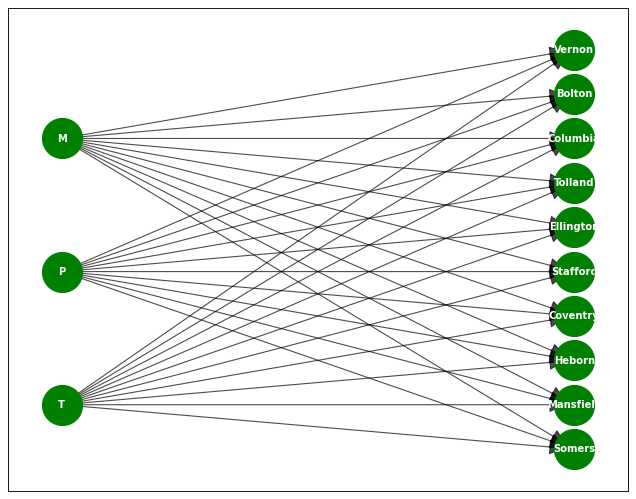

In [6]:
# Network flow
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

G = nx.DiGraph()
G.add_edges_from(
    [('M', 'A'), ('M', 'B'), ('M', 'C'),('M', 'D'), ('M', 'E'),('M', 'F'),('M', 'G'),('M', 'H'),('M', 'I'),('M', 'J'),
     ('P', 'A'), ('P', 'B'), ('P', 'C'),('P', 'D'), ('P', 'E'),('P', 'F'),('P', 'G'),('P', 'H'),('P', 'I'),('P', 'J'),
     ('T', 'A'), ('T', 'B'), ('T', 'C'),('T', 'D'), ('T', 'E'),('T', 'F'),('T', 'G'),('T', 'H'),('T', 'I'),('T', 'J')])

labels = {'A':'Vernon', 'B':'Bolton', 'C':'Columbia', 'D':'Tolland','E':'Ellington','F':'Stafford',
          'G':'Coventry','H':'Heborn','I':'Mansfield','J':'Somers','M':'M','P':'P','T':'T'}

# Need to create a layout when doing
# separate calls to draw nodes and edges
fixed_positions = {'M':(1, 7),'P':(1, 4),'T':(1, 1) ,'A':(5, 9),'B':(5, 8),'C':(5, 7),'D':(5, 6),
                   'E':(5, 5),'F':(5, 4),'G':(5, 3),'H':(5, 2),'I':(5, 1),'J':(5, 0)} 
fixed_nodes = fixed_positions.keys() 

pos = nx.spring_layout(G, k=2, pos=fixed_positions  ,fixed=fixed_nodes, iterations=100, threshold=0.0001, weight='weight', scale=1, center= [0,100], dim=2)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9,font_color='w',font_weight='bold')
nx.draw_networkx_nodes(G, pos=fixed_positions,  node_size = 1300, node_color= '#008000', )
nx.draw_networkx_edges(G, pos, arrows=True, arrowsize= 30, alpha=0.7, min_target_margin=5)

plt.show()

## Models

In [9]:
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))
    
from pyomo.environ import *

     |████████████████████████████████| 9.4MB 11.8MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 256kB 52.2MB/s 
     |████████████████████████████████| 163kB 57.1MB/s 
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 144898 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking co

### Network Model (baseline/deterministic): a Minimum Cost Flow model

#### **Objective Function** 

Our objective is to minimize the cost of shipping vaccines from hospitals to towns with fixed demand. The shipping price to transport the vaccine is directly proportional to distance (1 km = 1 dollar).

Desicion variables are the number of vaccines shipped from certain hospital to one town.

$\min(z) = 
71.13N1+ 79.79N2 + 86.62N3 + 79.07N4 + 91.93N5 + 72.75N6 + 79.55N7 + 60.18N8 + 65.93N9 + 67.95N10 
\quad\quad + 20.17H1+ 37.45H2 + 32.57H3 + 26.08H4 + 39.84H5 + 28.25H6 + 29.37H7 + 26.11H8 + 19.85H9 + 31.51H10 
\quad\quad + 63.01G1+ 51.41G2 + 78.74G3 + 70.43G4 + 74.44G5 + 53.37G6 + 64.07G7 + 43.09G8 + 55.34G9 + 43.19G10$

#### **Demand Constraints**

Based on the cumulative number of the confirmed cases on October 28. 

Each confirmed case should have one vaccine.

We could express the demand constriant as follows:

$ N1+ H1+ G1 = D1$      (Vernon)

$ N2+ H2+ G2 = D2$       (Mansfield)

$ N3+ H3+ G3 = D3$    (Somers)

$ N4+ H4+ G4 = D4$ (Ellington)

$ N5+ H5+ G5 = D5$   (Stafford)

$ N6+ H6+ G6 = D6$  (Coventry)

$ N7+ H7+ G7 = D7$  (Tolland)

$ N8+ H8+ G8 = D8$  (Heborn)

$ N9+ H9+ G9 = D9$  (Bolton)

$ N10+ H10+ G20 = D10$   (Columbia)

$ D1 + D2 + D3 + D4 + D5 + D6 + D7 + D8 + D9 + D10= D$   (Total Demand)


#### **Supply Constraints**
Each hospital must cover at least 30% of the demand for vaccines for the county. Thus, for the supply of vaccines from each hospitals, we can express the capacity constraint as follows: 


●	Yale New Haven Hospital :

$ N1+ N2 + N3 + N4 + N5 + N6 + N7 + N8 + N9 + N10 \geq 0.3 * D$

●	Hartford Hospital :

$ H1+ H2 + H3 + H4 + H5 + H6 + H7 + H8 + H9 + H10 \geq 0.3 * D$

●	Groton/Lawrence and Memorial Hospital 

$ G1+ G2 + G3 + G4 + G5 + G6 + G7 + G8 + G9 + G10 \geq 0.3 * D$

#### Build Model

In [ ]:
# we have demand of each Town: the confirmed cases in Day 0
Demand = {
   'Vernon':   362,        
   'Mansfield':   327,        
   'Somers':   323,       
   'Ellington':   133,
   'Stafford': 130,
   'Coventry': 90,
   'Tolland': 82,
   'Heborn': 55,
   'Bolton': 39,
   'Columbia': 32       
}

# supply
Supply = {
   'NewHaven':   10000000,        # Newhaven
   'Hartford':   10000000,       # Hartford 
   'Groton':     10000000     # Groton
}

# remember, it is DEMAND - SUPPLY pairs (might seem backwards)
T = {
    ('Vernon','NewHaven'): 71.13,    # from new haven to 10 towns
    ('Mansfield','NewHaven'): 79.79,
    ('Somers','NewHaven'): 86.62,
    ('Ellington','NewHaven'): 79.07,
    ('Stafford','NewHaven'): 91.93,
    ('Coventry','NewHaven'): 72.75,
    ('Tolland','NewHaven'): 79.55,
    ('Heborn','NewHaven'): 60.18,
    ('Bolton','NewHaven'): 65.93,
    ('Columbia','NewHaven'): 67.95,
     
    ('Vernon','Hartford'): 20.17,       # from hartford to towns
    ('Mansfield','Hartford'): 37.45,
    ('Somers','Hartford'): 32.57,
    ('Ellington','Hartford'): 26.08,
    ('Stafford','Hartford'): 39.84,
    ('Coventry','Hartford'): 28.25,
    ('Tolland','Hartford'): 29.37,
    ('Heborn','Hartford'): 26.11,
    ('Bolton','Hartford'): 19.85,
    ('Columbia','Hartford'): 31.51,
     
    ('Vernon','Groton'): 63.01,        # from Groton to towns.
    ('Mansfield','Groton'): 51.41,
    ('Somers','Groton'): 78.74,
    ('Ellington','Groton'): 70.43,
    ('Stafford','Groton'): 74.44,
    ('Coventry','Groton'): 53.37,
    ('Tolland','Groton'): 64.07,
    ('Heborn','Groton'): 43.09,
    ('Bolton','Groton'): 55.34,
    ('Columbia','Groton'): 43.19,
    
}

In [ ]:
# define the model
# Step 0: Create an instance of the model
model = ConcreteModel()

# Step 1: Define index sets - dictionary syntax {key : value}
CUS = list(Demand.keys()) # CUS = customers (demand)
SRC = list(Supply.keys()) # SRC = source (supply)

# Step 2: Define the decision 
model.x = Var(CUS, SRC, domain = NonNegativeIntegers) # the number of vaccines should be non-negative integers

# Step 3: Define Objective
model.Cost = Objective(
    expr = sum([T[c,s]*model.x[c,s] for c in CUS for s in SRC]),
    sense = minimize)

In [ ]:
# Step 4: Add Constraints (note the ease in which this happens with for loops!)
model.src = ConstraintList()
for s in SRC:
    model.src.add(sum([model.x[c,s] for c in CUS]) <= Supply[s])
    
for s in SRC:
    model.src.add(sum([model.x[c,s] for c in CUS]) >= 1573*0.3)   

model.dmd = ConstraintList()
for c in CUS:
    model.dmd.add(sum([model.x[c,s] for s in SRC]) == Demand[c])

model.pprint()

5 Set Declarations
    dmd_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    src_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}
    x_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain              : Size : Members
        None :     2 : x_index_0*x_index_1 :   30 : {('Vernon', 'NewHaven'), ('Vernon', 'Hartford'), ('Vernon', 'Groton'), ('Mansfield', 'NewHaven'), ('Mansfield', 'Hartford'), ('Mansfield', 'Groton'), ('Somers', 'NewHaven'), ('Somers', 'Hartford'), ('Somers', 'Groton'), ('Ellington', 'NewHaven'), ('Ellington', 'Hartford'), ('Ellington', 'Groton'), ('Stafford', 'NewHaven'), ('Stafford', 'Hartford'), ('Stafford', 'Groton'), ('Coventry', 'NewHaven'), ('Coventry', 'Hartford'), ('Coventry', 'Groton'), ('Tolland', 'NewHaven'), ('Tolland', 'Ha

In [ ]:
# solve the model and show results
results = SolverFactory('cbc').solve(model)
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 77733.38
  Upper bound: 77733.38
  Number of objectives: 1
  Number of constraints: 16
  Number of variables: 30
  Number of binary variables: 0
  Number of integer variables: 30
  Number of nonzeros: 30
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.01
  Wallclock time: 0.01
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and 

#### Result

In [ ]:
# show the results
print('Minimun Total Cost:',model.Cost())

Minimun Total Cost: 77733.38000000002


In [ ]:
# print the solution for how much goes in each node
for c in CUS:
    for s in SRC:
      if 0 < model.x[c,s]():
        print(c, s,": ", model.x[c,s]())

Vernon NewHaven :  319.0
Vernon Hartford :  43.0
Mansfield Groton :  327.0
Somers Hartford :  323.0
Ellington Hartford :  133.0
Stafford Hartford :  130.0
Coventry Groton :  90.0
Tolland NewHaven :  82.0
Heborn NewHaven :  32.0
Heborn Groton :  23.0
Bolton NewHaven :  39.0
Columbia Groton :  32.0


### Monte Carlo Simulation and Network Model (Pt. 1): 

#### **Objective Function** 

Our objective is to estimate the cost of shipping vaccines from hospitals to towns with uncertain demand. The shipping price to transport the vaccine is directly proportional to distance (1 km = 1 dollar).



$\min(z) = 
71.13N1+ 79.79N2 + 86.62N3 + 79.07N4 + 91.93N5 + 72.75N6 + 79.55N7 + 60.18N8 + 65.93N9 + 67.95N10 
\quad\quad + 20.17H1+ 37.45H2 + 32.57H3 + 26.08H4 + 39.84H5 + 28.25H6 + 29.37H7 + 26.11H8 + 19.85H9 + 31.51H10 
\quad\quad + 63.01G1+ 51.41G2 + 78.74G3 + 70.43G4 + 74.44G5 + 53.37G6 + 64.07G7 + 43.09G8 + 55.34G9 + 43.19G10$

#### **Demand Constraints**

1.Demand distributions: Assume the demand/cases at each town centroid follows a triangle distribution 
-	The min will be cumulative COVID confirmed and likely cases in October 28 
-	The max will be 5x current numbers 
-	The mode will be 2x current numbers 


2.Each confirmed cases should have one vaccine.

We could express the demand constriant as follows:

$ N1+ H1+ G1 = D1$      (Vernon)

$ N2+ H2+ G2 = D2$       (Mansfield)

$ N3+ H3+ G3 = D3$    (Somers)

$ N4+ H4+ G4 = D4$ (Ellington)

$ N5+ H5+ G5 = D5$   (Stafford)

$ N6+ H6+ G6 = D6$  (Coventry)

$ N7+ H7+ G7 = D7$  (Tolland)

$ N8+ H8+ G8 = D8$  (Heborn)

$ N9+ H9+ G9 = D9$  (Bolton)

$ N10+ H10+ G20 = D10$   (Columbia)

$ D1 + D2 + D3 + D4 + D5 + D6 + D7 + D8 + D9 + D10= D$   (Total Demand)


#### **Supply Constraints**
Each hospital must cover at least 30% of the demand for vaccines for the county. Thus, for the supply of vaccines from each hospitals, we can express the capacity constraint as follows: 


●	Yale New Haven Hospital :

$ N1+ N2 + N3 + N4 + N5 + N6 + N7 + N8 + N9 + N10 \geq 0.3 * D$

●	Hartford Hospital :

$ H1+ H2 + H3 + H4 + H5 + H6 + H7 + H8 + H9 + H10 \geq 0.3 * D$

●	Groton/Lawrence and Memorial Hospital 

$ G1+ G2 + G3 + G4 + G5 + G6 + G7 + G8 + G9 + G10 \geq 0.3 * D$

#### Build Model

In [10]:
# import necessary modules
import pandas as pd
import numpy as np

Vernon = []
Mansfield = []
Somers = []
Ellington = []
Stafford = []
Coventry = []
Tolland = []
Hebron = []
Bolton = []
Columbia = []
Total_Cases = []
Costs = []

Vernon_NewHaven = []
Vernon_Hartford = []
Vernon_Groton = []
Mansfield_NewHaven = []
Mansfield_Hartford = []
Mansfield_Groton = []
Somers_NewHaven = []
Somers_Hartford = []
Somers_Groton = []
Ellington_NewHaven = []
Ellington_Hartford = []
Ellington_Groton = []
Stafford_NewHaven = []
Stafford_Hartford = []
Stafford_Groton = []
Coventry_NewHaven = []
Coventry_Hartford = []
Coventry_Groton = []
Tolland_NewHaven = []
Tolland_Hartford = []
Tolland_Groton = []
Hebron_NewHaven = []
Hebron_Hartford = []
Hebron_Groton = []
Bolton_NewHaven = []
Bolton_Hartford = []
Bolton_Groton = []
Columbia_NewHaven = []
Columbia_Hartford = []
Columbia_Groton = []

for i in np.arange(0,1000,1):
  # DEMAND - SUPPLY pairs (might seem backwards)
  T = {
      ('Vernon','NewHaven'):    71.13, # from Yale New Haven Hospital to Vernon
      ('Mansfield','NewHaven'): 79.79, 
      ('Somers','NewHaven'):    86.62,
      ('Ellington','NewHaven'): 79.07,
      ('Stafford','NewHaven'):  91.93,
      ('Coventry','NewHaven'):  72.75,
      ('Tolland','NewHaven'):   79.55,
      ('Hebron','NewHaven'):    60.18,
      ('Bolton','NewHaven'):    65.93,
      ('Columbia','NewHaven'):  67.95,
      
      ('Vernon','Hartford'):    20.17, # from Hartford Hospital to Vernon
      ('Mansfield','Hartford'): 37.45,
      ('Somers','Hartford'):    32.57,
      ('Ellington','Hartford'): 26.08,
      ('Stafford','Hartford'):  39.84,
      ('Coventry','Hartford'):  28.25,
      ('Tolland','Hartford'):   29.37,
      ('Hebron','Hartford'):    26.11,
      ('Bolton','Hartford'):    19.85,
      ('Columbia','Hartford'):  31.51,
      
      ('Vernon','Groton'):      63.01, # from Groton/Lawrence and Memorial Hospital to Vernon
      ('Mansfield','Groton'):   51.41,
      ('Somers','Groton'):      78.74,
      ('Ellington','Groton'):   70.43,
      ('Stafford','Groton'):    74.44,
      ('Coventry','Groton'):    53.37,
      ('Tolland','Groton'):     64.07,
      ('Hebron','Groton'):      43.09,
      ('Bolton','Groton'):      55.34,
      ('Columbia','Groton'):    43.19,
      
  }

  # Assume hospitals have infinite supply of vaccines
  Supply = {
    'NewHaven':   10000000,        # Yale New Haven Hospital
    'Hartford':   10000000,        # Hartford Hospital
    'Groton':     10000000         # Groton/Lawrence and Memorial Hospital
  }

  # “Confirmed Cases” on Day 0
  Cases = {
    'Vernon':    362,        
    'Mansfield': 327,        
    'Somers':    323,       
    'Ellington': 133,
    'Stafford':  130,
    'Coventry':  90,
    'Tolland':   82,
    'Hebron':    55,
    'Bolton':    39,
    'Columbia':  32       
  }

  # Specify Demand dictionary
  # min = “Confirmed Cases” on Day 0, mode = 2*“Confirmed Cases” on Day 0, max = 5*“Confirmed Cases” on Day 0
  Demand = {
    'Vernon':      int(np.round(np.random.triangular(Cases['Vernon'],2*Cases['Vernon'],5*Cases['Vernon'], size=1),0)),           # Vernon     
    'Mansfield':   int(np.round(np.random.triangular(Cases['Mansfield'],2*Cases['Mansfield'],5*Cases['Mansfield'], size=1),0)),  # Mansfield      
    'Somers':      int(np.round(np.random.triangular(Cases['Somers'],2*Cases['Somers'],5*Cases['Somers'], size=1),0)),           # Somers      
    'Ellington':   int(np.round(np.random.triangular(Cases['Ellington'],2*Cases['Ellington'],5*Cases['Ellington'], size=1),0)),  # Ellington       
    'Stafford':    int(np.round(np.random.triangular(Cases['Stafford'],2*Cases['Stafford'],5*Cases['Stafford'], size=1),0)),     # Stafford      
    'Coventry':    int(np.round(np.random.triangular(Cases['Coventry'],2*Cases['Coventry'],5*Cases['Coventry'], size=1),0)),     # Coventry    
    'Tolland':     int(np.round(np.random.triangular(Cases['Tolland'],2*Cases['Tolland'],5*Cases['Tolland'], size=1),0)),        # Tolland    
    'Hebron':      int(np.round(np.random.triangular(Cases['Hebron'],2*Cases['Hebron'],5*Cases['Hebron'], size=1),0)),           # Hebron 
    'Bolton':      int(np.round(np.random.triangular(Cases['Bolton'],2*Cases['Bolton'],5*Cases['Bolton'], size=1),0)),           # Bolton  
    'Columbia':    int(np.round(np.random.triangular(Cases['Columbia'],2*Cases['Columbia'],5*Cases['Columbia'], size=1),0))      # Columbia    
  }

  Total_Demand = sum(Demand.values())

  # Store each towns cases and the total cases
  Vernon.append(Demand['Vernon'])
  Mansfield.append(Demand['Mansfield'])
  Somers.append(Demand['Somers'])
  Ellington.append(Demand['Ellington'])
  Stafford.append(Demand['Stafford'])
  Coventry.append(Demand['Coventry'])
  Tolland.append(Demand['Tolland'])
  Hebron.append(Demand['Hebron'])
  Bolton.append(Demand['Bolton'])
  Columbia.append(Demand['Columbia'])
  Total_Cases.append(Total_Demand)

  # define the model
  # Step 0: Create an instance of the model
  model = ConcreteModel()

  # Step 1: Define index sets - dictionary syntax {key : value}
  Towns = list(Demand.keys()) # town (demand)
  Hospitals = list(Supply.keys()) # hospital (supply)

  # Step 2: Define the decision 
  model.x = Var(Towns,Hospitals, domain = NonNegativeIntegers)

  # Step 3: Define Objective
  model.Cost = Objective(
      expr = sum([T[t,h]*model.x[t,h] for t in Towns for h in Hospitals]),
      sense = minimize)
  
  # Step 4: Add Constraints (note the ease in which this happens with for loops!)
  # Demand Constraints
  model.dmd = ConstraintList()
  for t in Towns:
      model.dmd.add(sum([model.x[t,h] for h in Hospitals]) == Demand[t])

  # Supply Constraints       
  model.spl = ConstraintList()
  for h in Hospitals:
      model.spl.add(sum([model.x[t,h] for t in Towns]) >= Total_Demand*0.3)

  # model.pprint()

  # solve the model and show results
  results = SolverFactory('cbc').solve(model)
  #results.write()

  # Store each hospitals allocation
  Vernon_NewHaven.append(model.x['Vernon','NewHaven']())
  Vernon_Hartford.append(model.x['Vernon','Hartford']())
  Vernon_Groton.append(model.x['Vernon','Groton']())
  Mansfield_NewHaven.append(model.x['Mansfield','NewHaven']())
  Mansfield_Hartford.append(model.x['Mansfield','Hartford']())
  Mansfield_Groton.append(model.x['Mansfield','Groton']())
  Somers_NewHaven.append(model.x['Somers','NewHaven']())
  Somers_Hartford.append(model.x['Somers','Hartford']())
  Somers_Groton.append(model.x['Somers','Groton']())
  Ellington_NewHaven.append(model.x['Ellington','NewHaven']())
  Ellington_Hartford.append(model.x['Ellington','Hartford']())
  Ellington_Groton.append(model.x['Ellington','Groton']())
  Stafford_NewHaven.append(model.x['Stafford','NewHaven']())
  Stafford_Hartford.append(model.x['Stafford','Hartford']())
  Stafford_Groton.append(model.x['Stafford','Groton']())
  Coventry_NewHaven.append(model.x['Coventry','NewHaven']())
  Coventry_Hartford.append(model.x['Coventry','Hartford']())
  Coventry_Groton.append(model.x['Coventry','Groton']())
  Tolland_NewHaven.append(model.x['Tolland','NewHaven']())
  Tolland_Hartford.append(model.x['Tolland','Hartford']())
  Tolland_Groton.append(model.x['Tolland','Groton']())
  Hebron_NewHaven.append(model.x['Hebron','NewHaven']())
  Hebron_Hartford.append(model.x['Hebron','Hartford']())
  Hebron_Groton.append(model.x['Hebron','Groton']())
  Bolton_NewHaven.append(model.x['Bolton','NewHaven']())
  Bolton_Hartford.append(model.x['Bolton','Hartford']())
  Bolton_Groton.append(model.x['Bolton','Groton']())
  Columbia_NewHaven.append(model.x['Columbia','NewHaven']())
  Columbia_Hartford.append(model.x['Columbia','Hartford']())
  Columbia_Groton.append(model.x['Columbia','Groton']())

  # Store the total cost
  Costs.append(model.Cost())

#### Result 

In [11]:
# the demand from each town and the minimun total cost
df1 = pd.DataFrame({'Vernon': Vernon,
                   'Mansfield':  Mansfield,
                   'Somers': Somers,
                   'Ellington': Ellington,
                   'Stafford': Stafford,
                   'Coventry': Coventry,
                   'Tolland': Tolland,
                   'Hebron': Hebron,
                   'Bolton': Bolton,
                   'Columbia': Columbia,
                   'Total_Cases': Total_Cases,
                   'Total Cost': Costs})
df1

,Vernon,Mansfield,Somers,Ellington,Stafford,Coventry,Tolland,Hebron,Bolton,Columbia,Total_Cases,Total Cost
0,1175,597,520,288,274,260,277,118,111,54,3674,179398.58
1,511,1428,373,376,522,295,112,203,75,39,3934,194365.17
2,1077,872,598,500,364,196,264,176,109,74,4230,206999.75
3,831,1133,924,152,330,206,184,175,63,48,4046,199501.45
4,1327,666,513,277,342,154,242,107,93,71,3792,185606.07
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1129,1280,714,295,337,222,124,224,153,78,4556,219004.98
996,1010,774,629,465,599,189,242,123,125,59,4215,211982.57
997,642,681,740,335,391,319,269,110,95,70,3652,183287.94
998,1059,652,1160,317,444,134,247,235,70,66,4384,221841.53


In [12]:
# The total cases and total cost
Cases_and_Cost1 = pd.concat([df1['Total_Cases'],df1['Total Cost']],axis=1)
Cases_and_Cost1

,Total_Cases,Total Cost
0,3674,179398.58
1,3934,194365.17
2,4230,206999.75
3,4046,199501.45
4,3792,185606.07
...,...,...
995,4556,219004.98
996,4215,211982.57
997,3652,183287.94
998,4384,221841.53


In [13]:
# all the flows from hospitals to towns
df1_hospitals = pd.DataFrame({'NewHaven_Vernon': Vernon_NewHaven,
                              'Hartford_Vernon': Vernon_Hartford,
                              'Groton_Vernon': Vernon_Groton,
                              'NewHaven_Mansfield':  Mansfield_NewHaven,
                              'Hartford_Mansfield':  Mansfield_Hartford,
                              'Groton_Mansfield':  Mansfield_Groton,
                              'NewHaven_Somers':  Somers_NewHaven,
                              'Hartford_Somers':  Somers_Hartford,
                              'Groton_Somers':  Somers_Groton,
                              'NewHaven_Ellington':  Ellington_NewHaven,
                              'Hartford_Ellington':  Ellington_Hartford,
                              'Groton_Ellington':  Ellington_Groton,
                              'NewHaven_Stafford':  Stafford_NewHaven,
                              'Hartford_Stafford':  Stafford_Hartford,
                              'Groton_Stafford':  Stafford_Groton,
                              'NewHaven_Coventry':  Coventry_NewHaven,
                              'Hartford_Coventry':  Coventry_Hartford,
                              'Groton_Coventry':  Coventry_Groton,
                              'NewHaven_Tolland':  Tolland_NewHaven,
                              'Hartford_Tolland':  Tolland_Hartford,
                              'Groton_Tolland':  Tolland_Groton,
                              'NewHaven_Hebron':  Hebron_NewHaven,
                              'Hartford_Hebron':  Hebron_Hartford,
                              'Groton_Hebron':  Hebron_Groton,
                              'NewHaven_Bolton':  Bolton_NewHaven,
                              'Hartford_Bolton':  Bolton_Hartford,
                              'Groton_Bolton':  Bolton_Groton,
                              'NewHaven_Columbia':  Columbia_NewHaven,
                              'Hartford_Columbia':  Columbia_Hartford,
                              'Groton_Columbia':  Columbia_Groton})
df1_hospitals

,NewHaven_Vernon,Hartford_Vernon,Groton_Vernon,NewHaven_Mansfield,Hartford_Mansfield,Groton_Mansfield,NewHaven_Somers,Hartford_Somers,Groton_Somers,NewHaven_Ellington,Hartford_Ellington,Groton_Ellington,NewHaven_Stafford,Hartford_Stafford,Groton_Stafford,NewHaven_Coventry,Hartford_Coventry,Groton_Coventry,NewHaven_Tolland,Hartford_Tolland,Groton_Tolland,NewHaven_Hebron,Hartford_Hebron,Groton_Hebron,NewHaven_Bolton,Hartford_Bolton,Groton_Bolton,NewHaven_Columbia,Hartford_Columbia,Groton_Columbia
0,715.0,460.0,0.0,0.0,0.0,597.0,0.0,520.0,0.0,0.0,288.0,0.0,0.0,200.0,74.0,0.0,0.0,260.0,277.0,0.0,0.0,0.0,0.0,118.0,111.0,0.0,0.0,0.0,0.0,54.0
1,210.0,301.0,0.0,247.0,0.0,1181.0,0.0,373.0,0.0,0.0,376.0,0.0,0.0,522.0,0.0,295.0,0.0,0.0,112.0,0.0,0.0,203.0,0.0,0.0,75.0,0.0,0.0,39.0,0.0,0.0
2,847.0,230.0,0.0,0.0,0.0,872.0,0.0,598.0,0.0,0.0,500.0,0.0,0.0,364.0,0.0,0.0,0.0,196.0,264.0,0.0,0.0,49.0,0.0,127.0,109.0,0.0,0.0,0.0,0.0,74.0
3,619.0,212.0,0.0,0.0,0.0,1133.0,0.0,924.0,0.0,0.0,152.0,0.0,0.0,330.0,0.0,173.0,0.0,33.0,184.0,0.0,0.0,175.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,48.0
4,803.0,524.0,0.0,0.0,0.0,666.0,0.0,513.0,0.0,0.0,277.0,0.0,0.0,202.0,140.0,0.0,0.0,154.0,242.0,0.0,0.0,0.0,0.0,107.0,93.0,0.0,0.0,0.0,0.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,653.0,476.0,0.0,0.0,0.0,1280.0,0.0,714.0,0.0,0.0,295.0,0.0,0.0,337.0,0.0,213.0,0.0,9.0,124.0,0.0,0.0,224.0,0.0,0.0,153.0,0.0,0.0,0.0,0.0,78.0
996,898.0,112.0,0.0,0.0,0.0,774.0,0.0,629.0,0.0,0.0,465.0,0.0,0.0,479.0,120.0,0.0,0.0,189.0,242.0,0.0,0.0,0.0,0.0,123.0,125.0,0.0,0.0,0.0,0.0,59.0
997,642.0,0.0,0.0,0.0,0.0,681.0,0.0,740.0,0.0,0.0,335.0,0.0,0.0,385.0,6.0,0.0,0.0,319.0,269.0,0.0,0.0,90.0,0.0,20.0,95.0,0.0,0.0,0.0,0.0,70.0
998,999.0,60.0,0.0,0.0,0.0,652.0,0.0,1160.0,0.0,0.0,317.0,0.0,0.0,215.0,229.0,0.0,0.0,134.0,247.0,0.0,0.0,0.0,0.0,235.0,70.0,0.0,0.0,0.0,0.0,66.0


In [14]:
# calculate the total number of vaccines shipped away from each hospital 
df1_hospitals['NewHaven'] = df1_hospitals['NewHaven_Vernon'] + df1_hospitals['NewHaven_Mansfield'] + df1_hospitals['NewHaven_Somers'] + df1_hospitals['NewHaven_Ellington'] + df1_hospitals['NewHaven_Stafford'] + df1_hospitals['NewHaven_Coventry'] + df1_hospitals['NewHaven_Tolland'] + df1_hospitals['NewHaven_Hebron'] + df1_hospitals['NewHaven_Bolton'] + df1_hospitals['NewHaven_Columbia']
df1_hospitals['Hartford'] = df1_hospitals['Hartford_Vernon'] + df1_hospitals['Hartford_Mansfield'] + df1_hospitals['Hartford_Somers'] + df1_hospitals['Hartford_Ellington'] + df1_hospitals['Hartford_Stafford'] + df1_hospitals['Hartford_Coventry'] + df1_hospitals['Hartford_Tolland'] + df1_hospitals['Hartford_Hebron'] + df1_hospitals['Hartford_Bolton'] + df1_hospitals['Hartford_Columbia']
df1_hospitals['Groton'] = df1_hospitals['Groton_Vernon'] + df1_hospitals['Groton_Mansfield'] + df1_hospitals['Groton_Somers'] + df1_hospitals['Groton_Ellington'] + df1_hospitals['Groton_Stafford'] + df1_hospitals['Groton_Coventry'] + df1_hospitals['Groton_Tolland'] + df1_hospitals['Groton_Hebron'] + df1_hospitals['Groton_Bolton'] + df1_hospitals['Groton_Columbia']

In [15]:
df1_hospitals[['NewHaven','Hartford','Groton']].describe()

,NewHaven,Hartford,Groton
count,1000.0000,1000.000000,1000.0000
mean,1261.1630,1680.036000,1261.1630
std,160.1527,213.548828,160.1527
min,840.0000,1119.000000,840.0000
25%,1148.0000,1529.750000,1148.0000
50%,1253.0000,1668.500000,1253.0000
75%,1369.0000,1824.000000,1369.0000
max,1724.0000,2296.000000,1724.0000


### Monte Carlo Simulation and Network Model (Pt. 2) 


#### **Objective Function** 

Our objective is to estimate the cost of shipping vaccines from hospitals to towns with uncertain demand. The shipping price to transport the vaccine is directly proportional to distance (1 km = 1 dollar).


$\min(z) = 
71.13N1+ 79.79N2 + 86.62N3 + 79.07N4 + 91.93N5 + 72.75N6 + 79.55N7 + 60.18N8 + 65.93N9 + 67.95N10 
\quad\quad + 20.17H1+ 37.45H2 + 32.57H3 + 26.08H4 + 39.84H5 + 28.25H6 + 29.37H7 + 26.11H8 + 19.85H9 + 31.51H10 
\quad\quad + 63.01G1+ 51.41G2 + 78.74G3 + 70.43G4 + 74.44G5 + 53.37G6 + 64.07G7 + 43.09G8 + 55.34G9 + 43.19G10$

#### **Demand Constraints**

1.Demand distributions: Assume the demand/cases at each town centroid follows a triangle distribution 
-	The min will be cumulative COVID confirmed and likely cases in October 28 
-	The max will be 5x current numbers 
-	The mode will be 2x current numbers 


2.Each confirmed and likely cases should have one vaccine.

We could express the demand constriant as follows:

$ N1+ H1+ G1 = D1$      (Vernon)

$ N2+ H2+ G2 = D2$       (Mansfield)

$ N3+ H3+ G3 = D3$    (Somers)

$ N4+ H4+ G4 = D4$ (Ellington)

$ N5+ H5+ G5 = D5$   (Stafford)

$ N6+ H6+ G6 = D6$  (Coventry)

$ N7+ H7+ G7 = D7$  (Tolland)

$ N8+ H8+ G8 = D8$  (Heborn)

$ N9+ H9+ G9 = D9$  (Bolton)

$ N10+ H10+ G20 = D10$   (Columbia)

$ D1 + D2 + D3 + D4 + D5 + D6 + D7 + D8 + D9 + D10= D$   (Total Demand)


#### **Supply Constraints**
Each hospital must cover at least 10% of the demand for vaccines for the county. Thus, for the supply of vaccines from each hospitals, we can express the capacity constraint as follows: 


●	Yale New Haven Hospital :

$ N1+ N2 + N3 + N4 + N5 + N6 + N7 + N8 + N9 + N10 \geq 0.1 * D$

●	Hartford Hospital :

$ H1+ H2 + H3 + H4 + H5 + H6 + H7 + H8 + H9 + H10 \geq 0.1 * D$

●	Groton/Lawrence and Memorial Hospital 

$ G1+ G2 + G3 + G4 + G5 + G6 + G7 + G8 + G9 + G10 \geq 0.1 * D$

#### Build Model

In [16]:
# import necessary modules
import pandas as pd
import numpy as np

Vernon = []
Mansfield = []
Somers = []
Ellington = []
Stafford = []
Coventry = []
Tolland = []
Hebron = []
Bolton = []
Columbia = []
Total_Cases = []
Costs = []

Vernon_NewHaven = []
Vernon_Hartford = []
Vernon_Groton = []
Mansfield_NewHaven = []
Mansfield_Hartford = []
Mansfield_Groton = []
Somers_NewHaven = []
Somers_Hartford = []
Somers_Groton = []
Ellington_NewHaven = []
Ellington_Hartford = []
Ellington_Groton = []
Stafford_NewHaven = []
Stafford_Hartford = []
Stafford_Groton = []
Coventry_NewHaven = []
Coventry_Hartford = []
Coventry_Groton = []
Tolland_NewHaven = []
Tolland_Hartford = []
Tolland_Groton = []
Hebron_NewHaven = []
Hebron_Hartford = []
Hebron_Groton = []
Bolton_NewHaven = []
Bolton_Hartford = []
Bolton_Groton = []
Columbia_NewHaven = []
Columbia_Hartford = []
Columbia_Groton = []


for i in np.arange(0,1000,1):
  # DEMAND - SUPPLY pairs (might seem backwards)
  T = {
      ('Vernon','NewHaven'):    71.13, # from Yale New Haven Hospital to Vernon
      ('Mansfield','NewHaven'): 79.79, 
      ('Somers','NewHaven'):    86.62,
      ('Ellington','NewHaven'): 79.07,
      ('Stafford','NewHaven'):  91.93,
      ('Coventry','NewHaven'):  72.75,
      ('Tolland','NewHaven'):   79.55,
      ('Hebron','NewHaven'):    60.18,
      ('Bolton','NewHaven'):    65.93,
      ('Columbia','NewHaven'):  67.95,
      
      ('Vernon','Hartford'):    20.17, # from Hartford Hospital to Vernon
      ('Mansfield','Hartford'): 37.45,
      ('Somers','Hartford'):    32.57,
      ('Ellington','Hartford'): 26.08,
      ('Stafford','Hartford'):  39.84,
      ('Coventry','Hartford'):  28.25,
      ('Tolland','Hartford'):   29.37,
      ('Hebron','Hartford'):    26.11,
      ('Bolton','Hartford'):    19.85,
      ('Columbia','Hartford'):  31.51,
      
      ('Vernon','Groton'):      63.01, # from Groton/Lawrence and Memorial Hospital to Vernon
      ('Mansfield','Groton'):   51.41,
      ('Somers','Groton'):      78.74,
      ('Ellington','Groton'):   70.43,
      ('Stafford','Groton'):    74.44,
      ('Coventry','Groton'):    53.37,
      ('Tolland','Groton'):     64.07,
      ('Hebron','Groton'):      43.09,
      ('Bolton','Groton'):      55.34,
      ('Columbia','Groton'):    43.19,
      
  }

  # Assume hospitals have infinite supply of vaccines
  Supply = {
    'NewHaven':   10000000,        # Yale New Haven Hospital
    'Hartford':   10000000,        # Hartford Hospital
    'Groton':     10000000         # Groton/Lawrence and Memorial Hospital
  }

  # “Confirmed Cases” on Day 0
  Cases = {
    'Vernon':    362,        
    'Mansfield': 327,        
    'Somers':    323,       
    'Ellington': 133,
    'Stafford':  130,
    'Coventry':  90,
    'Tolland':   82,
    'Hebron':    55,
    'Bolton':    39,
    'Columbia':  32       
  }

  # Specify Demand dictionary
  # min = “Confirmed Cases” on Day 0, mode = 2*“Confirmed Cases” on Day 0, max = 5*“Confirmed Cases” on Day 0
  Demand = {
    'Vernon':      int(np.round(np.random.triangular(Cases['Vernon'],2*Cases['Vernon'],5*Cases['Vernon'], size=1),0)),           # Vernon     
    'Mansfield':   int(np.round(np.random.triangular(Cases['Mansfield'],2*Cases['Mansfield'],5*Cases['Mansfield'], size=1),0)),  # Mansfield      
    'Somers':      int(np.round(np.random.triangular(Cases['Somers'],2*Cases['Somers'],5*Cases['Somers'], size=1),0)),           # Somers      
    'Ellington':   int(np.round(np.random.triangular(Cases['Ellington'],2*Cases['Ellington'],5*Cases['Ellington'], size=1),0)),  # Ellington       
    'Stafford':    int(np.round(np.random.triangular(Cases['Stafford'],2*Cases['Stafford'],5*Cases['Stafford'], size=1),0)),     # Stafford      
    'Coventry':    int(np.round(np.random.triangular(Cases['Coventry'],2*Cases['Coventry'],5*Cases['Coventry'], size=1),0)),     # Coventry    
    'Tolland':     int(np.round(np.random.triangular(Cases['Tolland'],2*Cases['Tolland'],5*Cases['Tolland'], size=1),0)),        # Tolland    
    'Hebron':      int(np.round(np.random.triangular(Cases['Hebron'],2*Cases['Hebron'],5*Cases['Hebron'], size=1),0)),           # Hebron 
    'Bolton':      int(np.round(np.random.triangular(Cases['Bolton'],2*Cases['Bolton'],5*Cases['Bolton'], size=1),0)),           # Bolton  
    'Columbia':    int(np.round(np.random.triangular(Cases['Columbia'],2*Cases['Columbia'],5*Cases['Columbia'], size=1),0))      # Columbia    
  }

  Total_Demand = sum(Demand.values())

  # Store each towns cases and the total cases
  Vernon.append(Demand['Vernon'])
  Mansfield.append(Demand['Mansfield'])
  Somers.append(Demand['Somers'])
  Ellington.append(Demand['Ellington'])
  Stafford.append(Demand['Stafford'])
  Coventry.append(Demand['Coventry'])
  Tolland.append(Demand['Tolland'])
  Hebron.append(Demand['Hebron'])
  Bolton.append(Demand['Bolton'])
  Columbia.append(Demand['Columbia'])
  Total_Cases.append(Total_Demand)

  # define the model
  # Step 0: Create an instance of the model
  model = ConcreteModel()

  # Step 1: Define index sets - dictionary syntax {key : value}
  Towns = list(Demand.keys()) # town (demand)
  Hospitals = list(Supply.keys()) # hospital (supply)

  # Step 2: Define the decision 
  model.x = Var(Towns,Hospitals, domain = NonNegativeIntegers)

  # Step 3: Define Objective
  model.Cost = Objective(
      expr = sum([T[t,h]*model.x[t,h] for t in Towns for h in Hospitals]),
      sense = minimize)
  
  # Step 4: Add Constraints (note the ease in which this happens with for loops!)
  # Demand Constraints
  model.dmd = ConstraintList()
  for t in Towns:
      model.dmd.add(sum([model.x[t,h] for h in Hospitals]) == Demand[t])

  # Supply Constraints       
  model.spl = ConstraintList()
  for h in Hospitals:
      model.spl.add(sum([model.x[t,h] for t in Towns]) >= Total_Demand*0.1)

  # model.pprint()

  # solve the model and show results
  results = SolverFactory('cbc').solve(model)
  #results.write()

    # Store each hospitals allocation
  Vernon_NewHaven.append(model.x['Vernon','NewHaven']())
  Vernon_Hartford.append(model.x['Vernon','Hartford']())
  Vernon_Groton.append(model.x['Vernon','Groton']())
  Mansfield_NewHaven.append(model.x['Mansfield','NewHaven']())
  Mansfield_Hartford.append(model.x['Mansfield','Hartford']())
  Mansfield_Groton.append(model.x['Mansfield','Groton']())
  Somers_NewHaven.append(model.x['Somers','NewHaven']())
  Somers_Hartford.append(model.x['Somers','Hartford']())
  Somers_Groton.append(model.x['Somers','Groton']())
  Ellington_NewHaven.append(model.x['Ellington','NewHaven']())
  Ellington_Hartford.append(model.x['Ellington','Hartford']())
  Ellington_Groton.append(model.x['Ellington','Groton']())
  Stafford_NewHaven.append(model.x['Stafford','NewHaven']())
  Stafford_Hartford.append(model.x['Stafford','Hartford']())
  Stafford_Groton.append(model.x['Stafford','Groton']())
  Coventry_NewHaven.append(model.x['Coventry','NewHaven']())
  Coventry_Hartford.append(model.x['Coventry','Hartford']())
  Coventry_Groton.append(model.x['Coventry','Groton']())
  Tolland_NewHaven.append(model.x['Tolland','NewHaven']())
  Tolland_Hartford.append(model.x['Tolland','Hartford']())
  Tolland_Groton.append(model.x['Tolland','Groton']())
  Hebron_NewHaven.append(model.x['Hebron','NewHaven']())
  Hebron_Hartford.append(model.x['Hebron','Hartford']())
  Hebron_Groton.append(model.x['Hebron','Groton']())
  Bolton_NewHaven.append(model.x['Bolton','NewHaven']())
  Bolton_Hartford.append(model.x['Bolton','Hartford']())
  Bolton_Groton.append(model.x['Bolton','Groton']())
  Columbia_NewHaven.append(model.x['Columbia','NewHaven']())
  Columbia_Hartford.append(model.x['Columbia','Hartford']())
  Columbia_Groton.append(model.x['Columbia','Groton']())

  # Store the total cost
  Costs.append(model.Cost())

#### Result

In [17]:
# the demand from each town and the minimun total cost
df2 = pd.DataFrame({'Vernon': Vernon,
                   'Mansfield':  Mansfield,
                   'Somers': Somers,
                   'Ellington': Ellington,
                   'Stafford': Stafford,
                   'Coventry': Coventry,
                   'Tolland': Tolland,
                   'Hebron': Hebron,
                   'Bolton': Bolton,
                   'Columbia': Columbia,
                   'Total_Cases': Total_Cases,
                   'Total Cost': Costs})
df2

,Vernon,Mansfield,Somers,Ellington,Stafford,Coventry,Tolland,Hebron,Bolton,Columbia,Total_Cases,Total Cost
0,1265,1476,806,396,294,350,158,248,129,74,5196,181767.38
1,933,634,624,251,343,256,155,154,137,66,3553,122081.01
2,791,1116,1109,258,530,280,114,110,76,117,4501,164829.49
3,1613,1107,477,277,305,177,363,109,96,83,4607,156494.26
4,619,724,468,221,229,331,175,170,99,98,3134,109405.26
...,...,...,...,...,...,...,...,...,...,...,...,...
995,770,651,851,601,547,107,163,202,157,64,4113,144459.31
996,999,609,728,279,333,284,258,76,64,62,3692,127856.40
997,513,567,585,284,374,114,126,175,83,145,2966,105150.17
998,690,514,905,335,443,258,220,160,152,114,3791,132963.41


In [18]:
# The total cases and total cost
Cases_and_Cost2 = pd.concat([df2['Total_Cases'],df2['Total Cost']],axis=1)
Cases_and_Cost2

,Total_Cases,Total Cost
0,5196,181767.38
1,3553,122081.01
2,4501,164829.49
3,4607,156494.26
4,3134,109405.26
...,...,...
995,4113,144459.31
996,3692,127856.40
997,2966,105150.17
998,3791,132963.41


In [19]:
# all the flows from hospitals to towns
df2_hospitals = pd.DataFrame({'NewHaven_Vernon': Vernon_NewHaven,
                              'Hartford_Vernon': Vernon_Hartford,
                              'Groton_Vernon': Vernon_Groton,
                              'NewHaven_Mansfield':  Mansfield_NewHaven,
                              'Hartford_Mansfield':  Mansfield_Hartford,
                              'Groton_Mansfield':  Mansfield_Groton,
                              'NewHaven_Somers':  Somers_NewHaven,
                              'Hartford_Somers':  Somers_Hartford,
                              'Groton_Somers':  Somers_Groton,
                              'NewHaven_Ellington':  Ellington_NewHaven,
                              'Hartford_Ellington':  Ellington_Hartford,
                              'Groton_Ellington':  Ellington_Groton,
                              'NewHaven_Stafford':  Stafford_NewHaven,
                              'Hartford_Stafford':  Stafford_Hartford,
                              'Groton_Stafford':  Stafford_Groton,
                              'NewHaven_Coventry':  Coventry_NewHaven,
                              'Hartford_Coventry':  Coventry_Hartford,
                              'Groton_Coventry':  Coventry_Groton,
                              'NewHaven_Tolland':  Tolland_NewHaven,
                              'Hartford_Tolland':  Tolland_Hartford,
                              'Groton_Tolland':  Tolland_Groton,
                              'NewHaven_Hebron':  Hebron_NewHaven,
                              'Hartford_Hebron':  Hebron_Hartford,
                              'Groton_Hebron':  Hebron_Groton,
                              'NewHaven_Bolton':  Bolton_NewHaven,
                              'Hartford_Bolton':  Bolton_Hartford,
                              'Groton_Bolton':  Bolton_Groton,
                              'NewHaven_Columbia':  Columbia_NewHaven,
                              'Hartford_Columbia':  Columbia_Hartford,
                              'Groton_Columbia':  Columbia_Groton})

In [20]:
# calculate the total number of vaccines shipped away from each hospital
df2_hospitals['NewHaven'] = df2_hospitals['NewHaven_Vernon'] + df2_hospitals['NewHaven_Mansfield'] + df2_hospitals['NewHaven_Somers'] + df2_hospitals['NewHaven_Ellington'] + df2_hospitals['NewHaven_Stafford'] + df2_hospitals['NewHaven_Coventry'] + df2_hospitals['NewHaven_Tolland'] + df2_hospitals['NewHaven_Hebron'] + df2_hospitals['NewHaven_Bolton'] + df2_hospitals['NewHaven_Columbia']
df2_hospitals['Hartford'] = df2_hospitals['Hartford_Vernon'] + df2_hospitals['Hartford_Mansfield'] + df2_hospitals['Hartford_Somers'] + df2_hospitals['Hartford_Ellington'] + df2_hospitals['Hartford_Stafford'] + df2_hospitals['Hartford_Coventry'] + df2_hospitals['Hartford_Tolland'] + df2_hospitals['Hartford_Hebron'] + df2_hospitals['Hartford_Bolton'] + df2_hospitals['Hartford_Columbia']
df2_hospitals['Groton'] = df2_hospitals['Groton_Vernon'] + df2_hospitals['Groton_Mansfield'] + df2_hospitals['Groton_Somers'] + df2_hospitals['Groton_Ellington'] + df2_hospitals['Groton_Stafford'] + df2_hospitals['Groton_Coventry'] + df2_hospitals['Groton_Tolland'] + df2_hospitals['Groton_Hebron'] + df2_hospitals['Groton_Bolton'] + df2_hospitals['Groton_Columbia']

In [21]:
df2_hospitals[['NewHaven','Hartford','Groton']].describe()

,NewHaven,Hartford,Groton
count,1000.000000,1000.000000,1000.000000
mean,419.573000,3352.020000,419.573000
std,52.400654,419.304586,52.400654
min,293.000000,2343.000000,293.000000
25%,382.000000,3054.000000,382.000000
50%,419.000000,3345.000000,419.000000
75%,455.000000,3638.250000,455.000000
max,580.000000,4640.000000,580.000000


## Analysis

### Probability Distribution of Shipping Costs

Model Pt1 90 percentile:  243150.29899999997
Model Pt2 90 percentile:  172520.00400000004


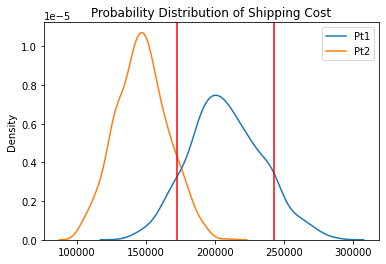

In [22]:
# probability density plot
import seaborn as sns
import matplotlib.pyplot as plt

# group the cost data in one df3
df3_cost = pd.DataFrame({'Pt1':Cases_and_Cost1['Total Cost'],
                   'Pt2':Cases_and_Cost2['Total Cost']})
 
sns.kdeplot(data=df3_cost)
plt.axvline(np.percentile(df3_cost['Pt1'], 90), color='red')
plt.axvline(np.percentile(df3_cost['Pt2'], 90), color='red')
plt.title('Probability Distribution of Shipping Cost')

print('Model Pt1 90 percentile: ',np.percentile(df3_cost['Pt1'], 90))
print('Model Pt2 90 percentile: ',np.percentile(df3_cost['Pt2'], 90))

Text(0.5, 1.0, 'Cumulative Distribution of Shipping Cost')

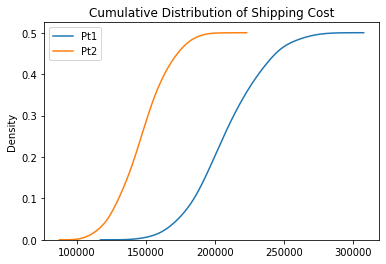

In [23]:
# cumulative distribution Plot
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.kdeplot(data=df3_cost,cumulative=True)
plt.title('Cumulative Distribution of Shipping Cost')

### Probability Distribution of the expected number of cases in 10 towns

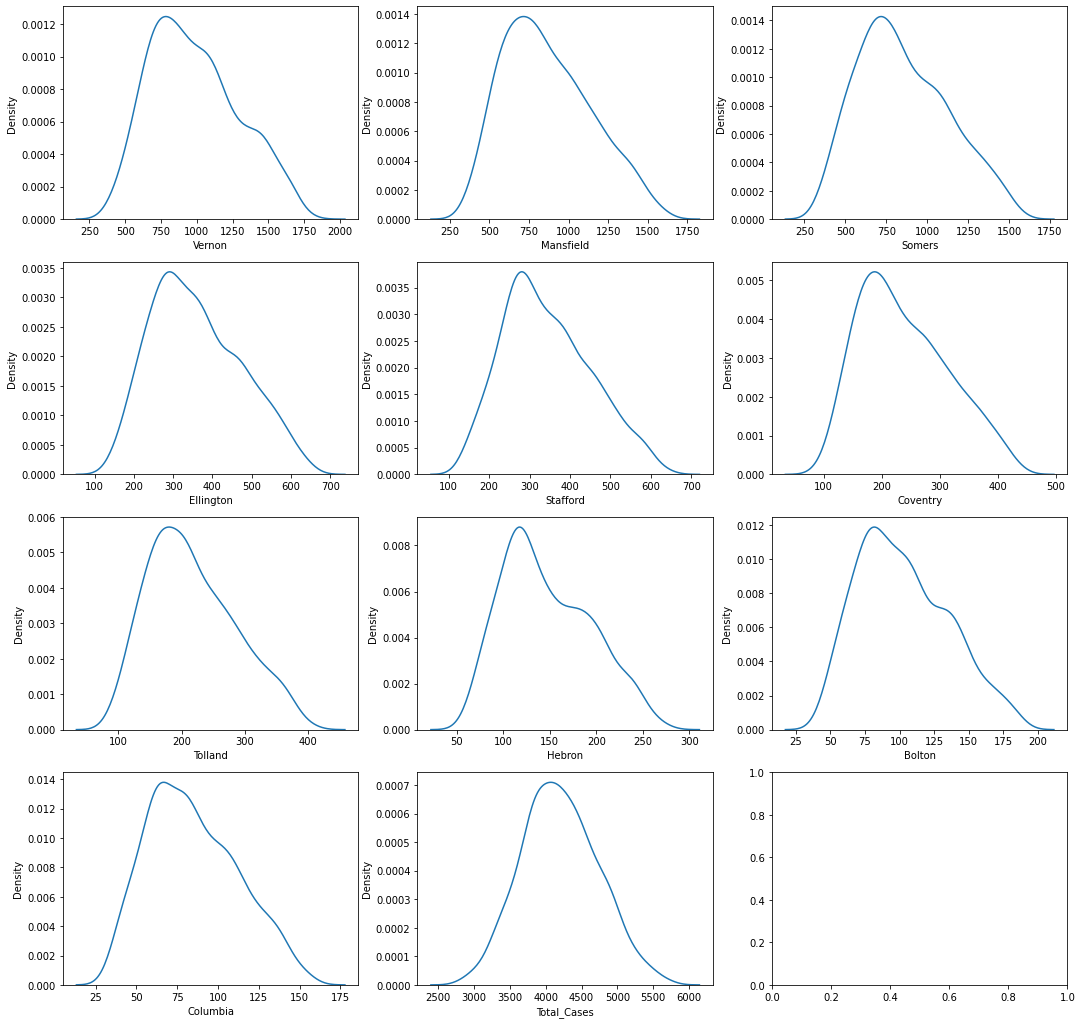

In [24]:
# probability density plot - Network Model Pt1
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 3, figsize=(18, 18))

sns.kdeplot(data=df1['Vernon'] , ax=axes[0,0])
sns.kdeplot(data=df1['Mansfield'], ax=axes[0,1])
sns.kdeplot(data=df1['Somers'], ax=axes[0,2])
sns.kdeplot(data=df1['Ellington'], ax=axes[1,0])
sns.kdeplot(data=df1['Stafford'], ax=axes[1,1])
sns.kdeplot(data=df1['Coventry'], ax=axes[1,2])
sns.kdeplot(data=df1['Tolland'], ax=axes[2,0])
sns.kdeplot(data=df1['Hebron'], ax=axes[2,1])
sns.kdeplot(data=df1['Bolton'], ax=axes[2,2])
sns.kdeplot(data=df1['Columbia'], ax=axes[3,0])
sns.kdeplot(data=df1['Total_Cases'], ax=axes[3,1])

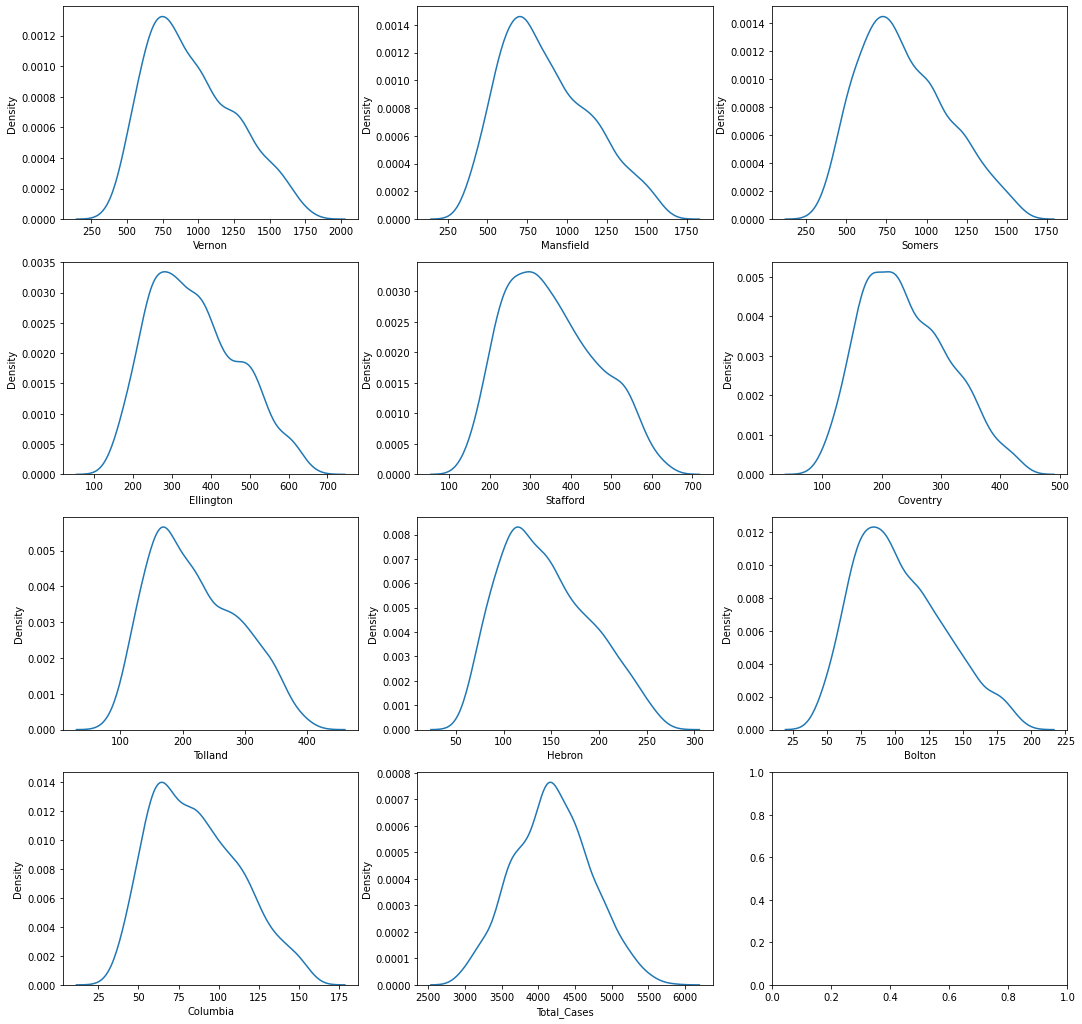

In [25]:
# probability density plot - Network Model Pt2
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 3, figsize=(18, 18))

sns.kdeplot(data=df2['Vernon'] , ax=axes[0,0])
sns.kdeplot(data=df2['Mansfield'], ax=axes[0,1])
sns.kdeplot(data=df2['Somers'], ax=axes[0,2])
sns.kdeplot(data=df2['Ellington'], ax=axes[1,0])
sns.kdeplot(data=df2['Stafford'], ax=axes[1,1])
sns.kdeplot(data=df2['Coventry'], ax=axes[1,2])
sns.kdeplot(data=df2['Tolland'], ax=axes[2,0])
sns.kdeplot(data=df2['Hebron'], ax=axes[2,1])
sns.kdeplot(data=df2['Bolton'], ax=axes[2,2])
sns.kdeplot(data=df2['Columbia'], ax=axes[3,0])
sns.kdeplot(data=df2['Total_Cases'], ax=axes[3,1])

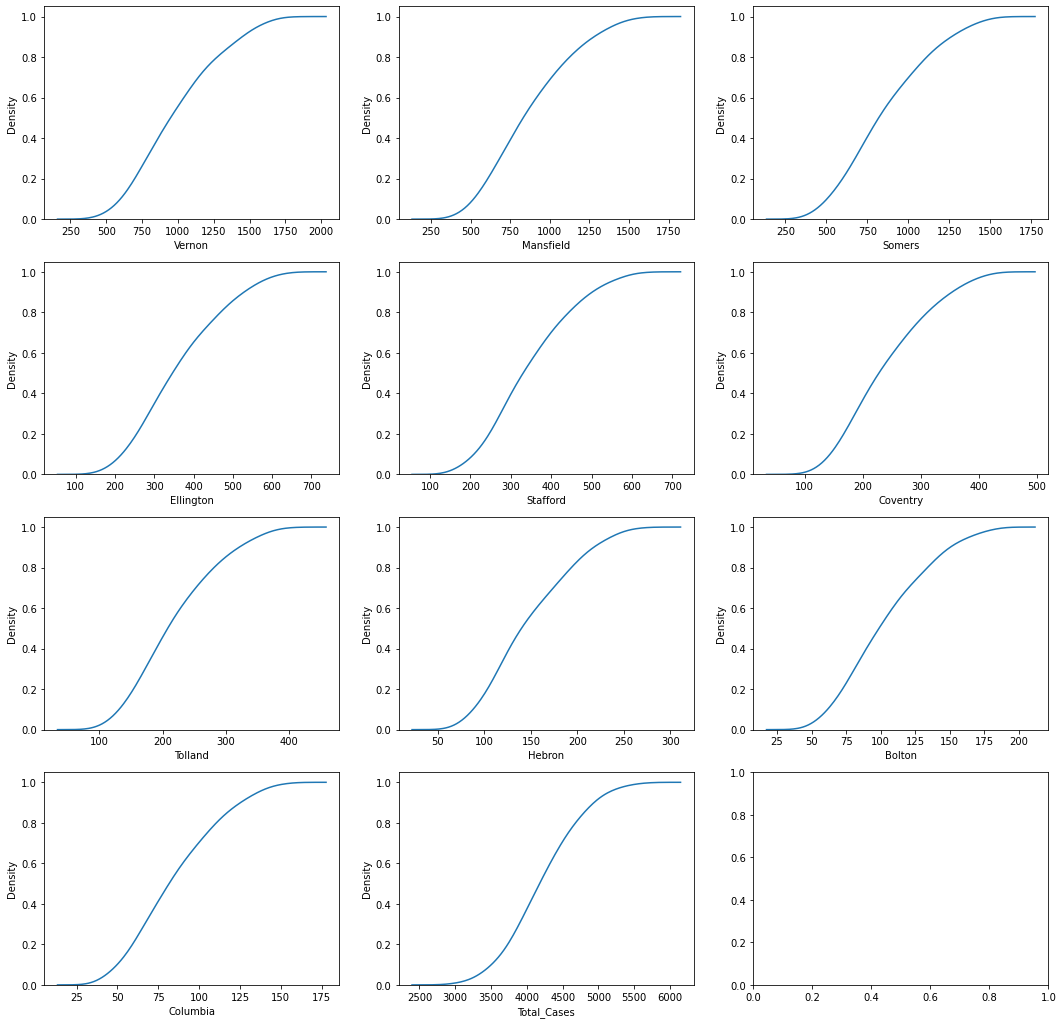

In [26]:
# cumulative distribution - Network Model Pt1
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 3, figsize=(18, 18))

sns.kdeplot(data=df1['Vernon'],cumulative=True, ax=axes[0,0])
sns.kdeplot(data=df1['Mansfield'],cumulative=True, ax=axes[0,1])
sns.kdeplot(data=df1['Somers'], cumulative=True,ax=axes[0,2])
sns.kdeplot(data=df1['Ellington'],cumulative=True, ax=axes[1,0])
sns.kdeplot(data=df1['Stafford'],cumulative=True, ax=axes[1,1])
sns.kdeplot(data=df1['Coventry'], cumulative=True,ax=axes[1,2])
sns.kdeplot(data=df1['Tolland'], cumulative=True,ax=axes[2,0])
sns.kdeplot(data=df1['Hebron'], cumulative=True,ax=axes[2,1])
sns.kdeplot(data=df1['Bolton'],cumulative=True, ax=axes[2,2])
sns.kdeplot(data=df1['Columbia'],cumulative=True, ax=axes[3,0])
sns.kdeplot(data=df1['Total_Cases'],cumulative=True, ax=axes[3,1])

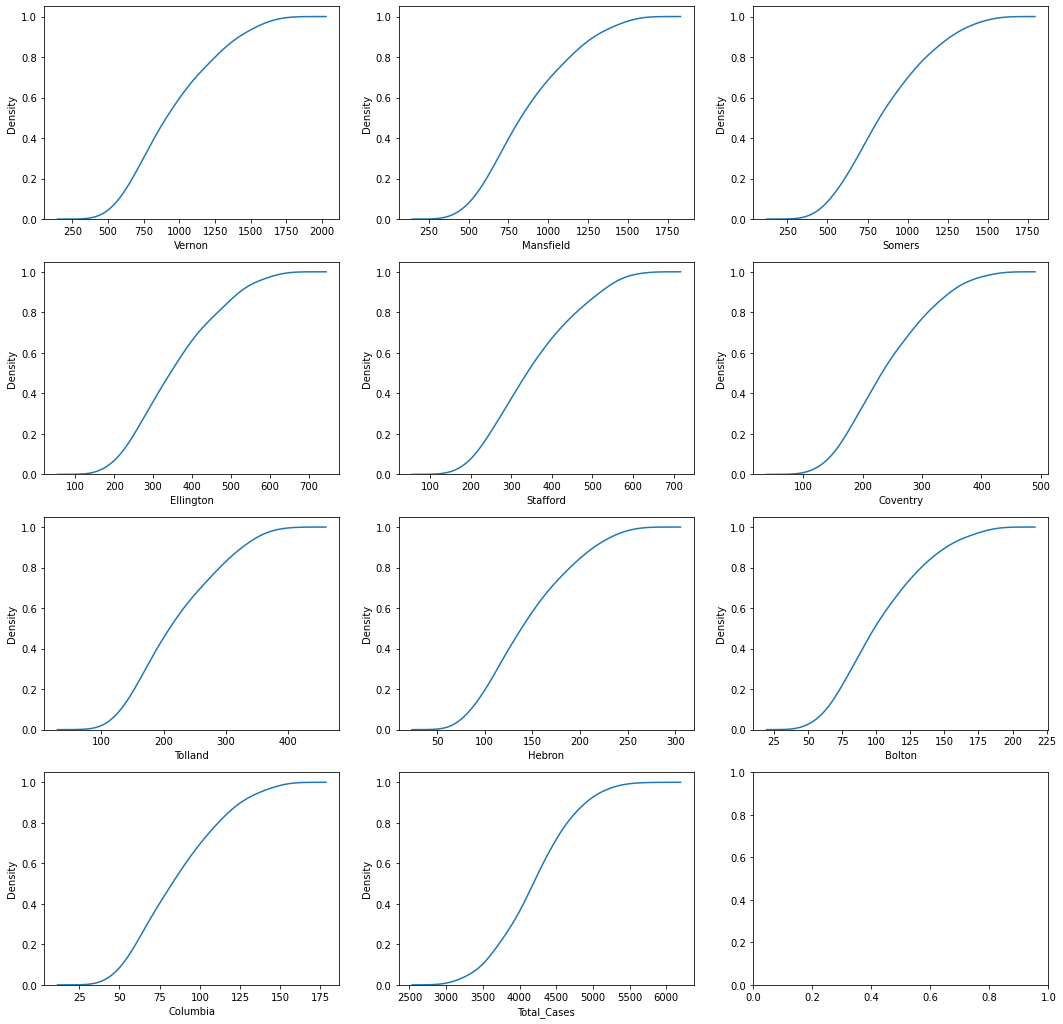

In [27]:
# cumulative distribution - Network Model Pt2
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 3, figsize=(18, 18))

sns.kdeplot(data=df2['Vernon'],cumulative=True, ax=axes[0,0])
sns.kdeplot(data=df2['Mansfield'],cumulative=True, ax=axes[0,1])
sns.kdeplot(data=df2['Somers'], cumulative=True,ax=axes[0,2])
sns.kdeplot(data=df2['Ellington'],cumulative=True, ax=axes[1,0])
sns.kdeplot(data=df2['Stafford'],cumulative=True, ax=axes[1,1])
sns.kdeplot(data=df2['Coventry'], cumulative=True,ax=axes[1,2])
sns.kdeplot(data=df2['Tolland'], cumulative=True,ax=axes[2,0])
sns.kdeplot(data=df2['Hebron'], cumulative=True,ax=axes[2,1])
sns.kdeplot(data=df2['Bolton'],cumulative=True, ax=axes[2,2])
sns.kdeplot(data=df2['Columbia'],cumulative=True, ax=axes[3,0])
sns.kdeplot(data=df2['Total_Cases'],cumulative=True, ax=axes[3,1])

Model Pt1 90 percentile:  4925.3
Model Pt2 90 percentile:  4886.3


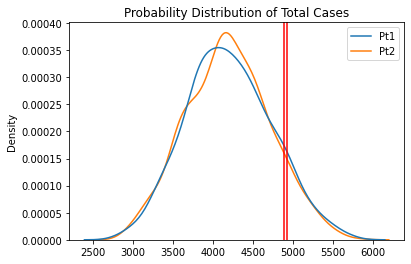

In [28]:
# probability density plot
import seaborn as sns
import matplotlib.pyplot as plt

# group the cost data in one df3
df3_cases = pd.DataFrame({'Pt1':Cases_and_Cost1['Total_Cases'],
                   'Pt2':Cases_and_Cost2['Total_Cases']})
 
sns.kdeplot(data=df3_cases)
plt.axvline(np.percentile(df3_cases['Pt1'], 90), color='red')
plt.axvline(np.percentile(df3_cases['Pt2'], 90), color='red')
plt.title('Probability Distribution of Total Cases')

print('Model Pt1 90 percentile: ',np.percentile(df3_cases['Pt1'], 90))
print('Model Pt2 90 percentile: ',np.percentile(df3_cases['Pt2'], 90))

## Conclusion

* The total shipping cost follows a normal distribution. From the cumulative distribution plot of pt1, we see that the government should reserve 243,150.29 USD to be 90% sure to cover the shipping cost in one month. From the cumulative distribution plot of pt2, we see that the government should reserve 172,520 USD to be 90% sure to cover the shipping cost in one month.

* Compared to the original assumption that each hospital should supply 30% vaccines for the whole county, we can save 70,630.29 dollars to use the new one with the minimum 10% supply requirement for each hospital.

* The probability distributions of 10 towns are right skewed when each hospital provides at least 10% or 30% of the vaccine to each town. The right skew is caused by that we set mode as 2 times the current confirmed case number while we set max as 5 times the current confirmed case number.

* The number of total confirmed cases follows a normal distribution. Based on the cumulative distribution plot of pt1, we could be 90% sure that 4,925 people might be tested positive in Tolland county in one month. Based on the cumulative distribution plot of pt2, we could be 90% sure that 4886 people might be tested positive in Tolland county in one month. There is no big difference in total confirmed cases between the two models.

* Hartford hospital is the best fit hospital for Tolland County to minimize the cost. When decreasing the requirement of supply percentage of each hospital, the mean of vaccines Hartford hospital delivers increases by 1672 while both of the other two hospitals deliver less vaccine after the assumption change. Thus, the hospital in Hartford delivers more vaccines to the towns in Tolland could minimize the total shipping cost.

* The interesting thing in model 2 and 3 is about the mean number of vaccines delivered by hospitals. Hartford delivers the most number of vaccines. New Haven and Groton have the same mean, min and max, which means these two hospitals could replace each other.

* The demand is fixed in the first baseline model. In the second and the third model, we simply assumed that the demand follows the probability distribution for the number of cases. However, vaccines were useless to Covid-19 victims, they protect people who have no antibodies. In reality, the demand will change depending on factors such as income, medical insurance, and vaccine safety. For further study, we can estimate demand based on these factors.


Group Member Contribution

Data Prep and EDA : All Members

Models:
* Baseline model: Ce Zhuang
* Network model pt1: Zihao Yan and Shuyao Chen
* Network model pt2: Simeng Deng and Yingxiao Zhu

Analysis: All members

Conclusion: All members

Video: Simeng Deng